## Package Setup

In [106]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Load Dataset

In [108]:
employee = pd.read_csv("employee_data.csv")
employee.head()

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,NaN,Waterbury Center,VT,5677,34584958,HKUN51252328472585
1,AGENT00002,Angelo Borjon,2005-12-27,414 Tanya Pass,NaN,Panama City,FL,32404,107363763,OPIS19290040088204
2,AGENT00003,Candy Spellman,2003-09-02,606 National Street,#306,Fayetteville,AR,72701,81744097,YSCJ67489688482590
3,AGENT00004,Mary Smith,2004-09-23,235 Hugh Thomas Drive,NaN,Panama City,FL,32404,67563771,ZANG21285355574581
4,AGENT00005,Mildred Diaz,2011-06-21,3426 Broadview Street,NaN,Montgomery,AL,36110,114951317,DZFS82244494451134


In [109]:
insurance = pd.read_csv("insurance_data.csv")
insurance.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,ACCT_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308,087-11-1946,Y,54,89,Y,3,L,Own,LI,109134974,HXJP58258181908465,Bachelor,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,Ricardo Gatlin,8595 West 81st Drive,NaN,Arvada,CO,80005,685-33-3536,N,61,80,Y,4,L,Rent,MI,40125819,JUND46859540983731,Bachelor,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,Lashawn Engles,637 Britannia Drive,NaN,Vallejo,CA,94591,378-36-0672,N,47,68,Y,6,L,Rent,MI,99513168,WGZZ90128415227650,PhD,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,Steven Bassett,2803 River Drive,NaN,Thunderbolt,GA,31404,669-92-1861,Y,36,16,Y,7,L,Mortgage,MI,18429110,WIKE91555436351397,Masters,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,Jason Rodriguez,7573 National Drive,NaN,Livermore,CA,94550,703-40-1033,Y,51,16,Y,2,M,Rent,HI,70752391,VYJW71311537294027,Masters,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [110]:
vendor = pd.read_csv("vendor_data.csv")
vendor

,VENDOR_ID,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
0,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703
1,VNDR00002,Garcia Ltd,5701 East Shirley Lane,NaN,Montgomery,AL,36117
2,VNDR00003,Cherry LLC,1217 Cottondale Road,NaN,Montgomery,AL,36109
3,VNDR00004,Mays-Benson,227 West Montgomery Cross Road,#736,Savannah,GA,31406
4,VNDR00005,Wilson PLC,23 North Hill Street,NaN,Nashville,TN,37210
...,...,...,...,...,...,...,...
595,VNDR00596,Rhodes-Mendez,1689 Fisher Pond Road,NaN,Saint Albans City,VT,5478
596,VNDR00597,Ortiz-Donovan,140 South Hill Avenue,#305,Fayetteville,AR,72701
597,VNDR00598,"Newton, Hodges and Henry",32512 Christine Drive,NaN,Union City,CA,94587
598,VNDR00599,Reeves-Leonard,12420 West Montebello Avenue,NaN,Litchfield Park,AZ,85340


### Data Understanding

**Employee Datasets**
- `AGENT_ID` = Agent Identifier
- `AGENT_NAME` = Agent Name
- `DATE_OF_JOINING` = Date of joining company
- `ADDRESS_LINE1` = Agent Home Address Line 1
- `ADDRESS_LINE2` = Agent Home Address Line 2
- `CITY` = Agent Home Address City
- `STATE` = Agent Home State
- `POSTAL_CODE` = 
- `EMP_ROUTING_NUMBER` = Agents Bank Routing Number
- `EMP_ACCT_NUMBER` = Agents Bank Account Number

**Insurance Datasets**
- `TXN_DATE_TIME` = Transaction Date
- `TRANSACTION_ID` = Unique Transaction ID
- `CUSTOMER_ID` = Unique Customer ID
- `POLICY_NUMBER` = Policy Number
- `POLICY_EFF_DT` = Policy Effective Date
- `LOSS_DT` = Date on which loss happened 
- `REPORT_DT` = Date on which the incident was reported
- `INSURANCE_TYPE` = Type of Insurance
- `PREMIUM_AMOUNT` = Premium Amount Paid by the Customer (Monthly)
- `CLAIM_AMOUNT` = Claim Amount raised by Customer
- `CUSTOMER_NAME` = Customer Name
- `ADDRESS_LINE1` = Customer Address
- `ADDRESS_LINE2` = Customer Address
- `CITY` = Customer City
- `STATE` = Customer State
- `POSTAL_CODE` = Postal Code
- `SSN` = Social Security Number
- `MARITAL_STATUS` = Married or not
- `AGE` = customer age
- `TENURE` = Customer Tenure with the Insurance Company in Month
- `EMPLOYMENT_STATUS` = Customer is employed ?
- `NO_OF_FAMILY_MEMBERS` = Number of Family members
- `RISK_SEGMENTATION` = Customer Risk Segmentation or Risk Level
- `HOUSE_TYPE` = Customer House Type
- `SOCIAL_CLASS` = Customer Income Group -- High Income , Low Income, Mid Income Group
- `ROUTING_NUMBER` = Customer Banking Routing Number
- `ACCT_NUMBER` = Customer Banking Account Number
- `CUSTOMER_EDUCATION_LEVEL` = Customer Education level
- `CLAIM_STATUS` = Claim Status (Approve/Decline)
- `INCIDENT_SEVERITY` = Incident Severity level
- `AUTHORITY_CONTACTED` = Which Authority was contacted for the incident?
- `ANY_INJURY` (Bool) = Any Injuries were reported
- `POLICE_REPORT_AVAILABLE` (Bool) = Is Police report available ?
- `INCIDENT_STATE` = State in which Incident happened
- `INCIDENT_CITY` = City in Which Incident happened
- `INCIDENT_HOUR_OF_THE_DAY` = Time of Incident in Hours
- `AGENT_ID` =Agent Unique ID who is working on the Claim
- `VENDOR_ID` = Vendor Unique ID who is working on the Claim

**Vendor Dataset**
- `VENDOR_ID` = Vendor Identifier
- `VENDOR_NAME` = Vendor Name
- `ADDRESS_LINE1` = vendor Home Address Line 1
- `ADDRESS_LINE2` = vendor Home Address Line 2
- `CITY` = vendor Home Address City
- `STATE` = vendor Home State
- `POSTAL_CODE` =

### Goals
The goals is to help the company to decide which customer's insurance claim would be approved

In [111]:
# combining 3 datasets
df = insurance.merge(employee, on='AGENT_ID', how='outer').merge(vendor, on='VENDOR_ID', how='outer')
df.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1_x,ADDRESS_LINE2_x,CITY_x,STATE_x,POSTAL_CODE_x,SSN,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,ACCT_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1_y,ADDRESS_LINE2_y,CITY_y,STATE_y,POSTAL_CODE_y,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
0,2020-07-30 00:00:00,TXN00001506,A00009261,PLC00005962,2019-08-18,2020-07-28,2020-07-28,Travel,81.62,1000.0,Mary Lamarche,1820 Scenic Avenue,NaN,Berkeley,CA,94709.0,247-13-3480,N,61.0,39.0,Y,3.0,L,Mortgage,LI,33721615.0,SVPG73064432886887,Masters,D,Major Loss,Ambulance,1.0,1.0,MA,Everett,20.0,AGENT00038,VNDR00001,Harold Ward,1993-01-24,171 Brickhill Circle,NaN,Pooler,GA,31322.0,114283917.0,XFPA46888061021143,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703.0
1,2020-10-18 00:00:00,TXN00003430,A00001375,PLC00004055,2017-10-03,2020-10-07,2020-10-12,Property,91.04,12000.0,Raymond Kinney,5615 West Acoma Drive,#24,Glendale,AZ,85306.0,104-39-7907,Y,45.0,84.0,Y,6.0,L,Mortgage,MI,30632736.0,FVND87325813310909,High School,A,Total Loss,Other,1.0,1.0,CO,Arvada,23.0,AGENT00045,VNDR00001,Frances Melia,2001-03-09,2139 Glynnwood Drive,NaN,Savannah,GA,31404.0,50185849.0,SRTU89087626370729,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703.0
2,2020-07-05 00:00:00,TXN00000868,A00005214,PLC00006439,2012-04-24,2020-07-01,2020-07-02,Mobile,11.74,100.0,Tyler Mccormick,8423 Pioneer Drive,NaN,Severn,MD,21144.0,867-04-9509,Y,61.0,91.0,Y,5.0,L,Rent,LI,95784988.0,QTRG22676440012886,Masters,A,Minor Loss,Ambulance,1.0,1.0,AL,Montgomery,12.0,AGENT00052,VNDR00001,Evelyn Mckinney,2018-05-02,20 Dearborn Drive,NaN,Manchester,CT,6042.0,91856616.0,LLBJ02457725590016,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703.0
3,2020-08-03 00:00:00,TXN00001598,A00009428,PLC00006004,2010-09-18,2020-07-29,2020-07-30,Property,98.72,31000.0,James Brown,1803 Hickory Avenue,UNIT C,Panama City,FL,32405.0,799-88-2064,Y,46.0,99.0,Y,7.0,M,Own,LI,13107398.0,EHBI65797557112163,Masters,A,Minor Loss,Other,1.0,1.0,CT,Manchester,0.0,AGENT00128,VNDR00001,Richard Kessler,1998-01-03,6420 Via Baron,NaN,Rancho Palos Verdes,CA,90275.0,39266080.0,YAJV22766086736134,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703.0
4,2021-01-14 00:00:00,TXN00005710,A00003493,PLC00008119,2017-03-02,2021-01-10,2021-01-11,Health,103.98,20000.0,Fernando Beckford,314 Mesa Street,NaN,Wheatland,CA,95692.0,704-49-9416,Y,64.0,109.0,Y,2.0,L,Rent,HI,87245477.0,ZDII00910040159814,High School,A,Total Loss,Police,1.0,0.0,AR,Fayetteville,14.0,AGENT00142,VNDR00001,Leland Low,2016-07-01,6672 Urban Court,NaN,Arvada,CO,80004.0,12429983.0,PLLC29856287335279,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703.0


## Data Cleaning

### Handling Duplicates

In [112]:
df.duplicated().sum()

0

### Drop Unused Columns

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10193 entries, 0 to 10192
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  float64
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1_x           10000 non-null  object 
 12  ADDRESS_LINE2_x           1495 non-null   object 
 13  CITY_x                    9946 non-null   object 
 14  STATE_

In [114]:
# Daftar kolom yang akan dihapus
unused_columns = ['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER', 'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'CUSTOMER_NAME', 
                  'ADDRESS_LINE1_x', 'ADDRESS_LINE2_x', 'CITY_x', 'STATE_x', 'POSTAL_CODE_x', 'SSN', 'ROUTING_NUMBER', 
                  'ACCT_NUMBER', 'AGENT_ID', 'VENDOR_ID', 'AGENT_NAME', 'DATE_OF_JOINING','ADDRESS_LINE1_y', 
                  'ADDRESS_LINE2_y', 'CITY_y', 'STATE_y', 'POSTAL_CODE_y', 'EMP_ROUTING_NUMBER', 'EMP_ACCT_NUMBER',
                  'VENDOR_NAME', 'ADDRESS_LINE1', 'ADDRESS_LINE2', 'CITY', 'STATE','POSTAL_CODE']

df = df.drop(columns=unused_columns)

### Handling Missing Values

In [115]:
df.isnull().sum()/len(df)

INSURANCE_TYPE              0.018935
PREMIUM_AMOUNT              0.018935
CLAIM_AMOUNT                0.018935
MARITAL_STATUS              0.018935
AGE                         0.018935
TENURE                      0.018935
EMPLOYMENT_STATUS           0.018935
NO_OF_FAMILY_MEMBERS        0.018935
RISK_SEGMENTATION           0.018935
HOUSE_TYPE                  0.018935
SOCIAL_CLASS                0.018935
CUSTOMER_EDUCATION_LEVEL    0.070833
CLAIM_STATUS                0.018935
INCIDENT_SEVERITY           0.018935
AUTHORITY_CONTACTED         0.209752
ANY_INJURY                  0.018935
POLICE_REPORT_AVAILABLE     0.018935
INCIDENT_STATE              0.018935
INCIDENT_CITY               0.023447
INCIDENT_HOUR_OF_THE_DAY    0.018935
dtype: float64

In [116]:
df['AUTHORITY_CONTACTED'].value_counts()

AUTHORITY_CONTACTED
Ambulance    4082
Police       2982
Other         991
Name: count, dtype: int64

We got some conclusion :
1. Most of the missing data is just 2% from the data. As long as it's under 5%. We gonna take it.
2. we got 31% vendor_id and vendor_name missing.
3. `AUTHORITY_CONTACTED` have 21% missing values

Solution :
1. We Gonna drop `INSURANCE_TYPE` missing values first, coz it's represent other's data and under 5%
2. We drop antoher < 5% missing values = `CUSTOMER_EDUCATION_LEVEL` and `INCIDENT_CITY`
3. We assume that this 31% missing values on vendor means **they are not using any vendor**. So we gonna fill it with "No Vendor"
4. Same as before, they might be not contacting anyone, they just claim insurance immediately, so we gonna fill `AUTHORITY_CONTACTED` with "Not Contacting"

In [117]:
# Drop missing transaction ID, incident city, city_y and CUSTOMER_EDUCATION_LEVEL
df = df.dropna(subset=['INSURANCE_TYPE','CUSTOMER_EDUCATION_LEVEL','INCIDENT_CITY'])


In [118]:
df['AUTHORITY_CONTACTED'] = df['AUTHORITY_CONTACTED'].fillna("Not Contacting")

In [119]:
df.isnull().sum()/len(df)

INSURANCE_TYPE              0.0
PREMIUM_AMOUNT              0.0
CLAIM_AMOUNT                0.0
MARITAL_STATUS              0.0
AGE                         0.0
TENURE                      0.0
EMPLOYMENT_STATUS           0.0
NO_OF_FAMILY_MEMBERS        0.0
RISK_SEGMENTATION           0.0
HOUSE_TYPE                  0.0
SOCIAL_CLASS                0.0
CUSTOMER_EDUCATION_LEVEL    0.0
CLAIM_STATUS                0.0
INCIDENT_SEVERITY           0.0
AUTHORITY_CONTACTED         0.0
ANY_INJURY                  0.0
POLICE_REPORT_AVAILABLE     0.0
INCIDENT_STATE              0.0
INCIDENT_CITY               0.0
INCIDENT_HOUR_OF_THE_DAY    0.0
dtype: float64

## Data Split

In [120]:
# split the data
from sklearn.model_selection import train_test_split

X = df.drop('CLAIM_STATUS',axis=1)
y = df['CLAIM_STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Setting Train Dataset

### Data Encoding

In [121]:
X_train_cat = X_train.select_dtypes(exclude=["number"])
X_train_num = X_train.select_dtypes(include=["number"])
y_train_cat = X_train.select_dtypes(exclude=["number"])
y_train_num = X_train.select_dtypes(include=["number"])

In [122]:
X_train_cat.columns

Index(['INSURANCE_TYPE', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS',
       'RISK_SEGMENTATION', 'HOUSE_TYPE', 'SOCIAL_CLASS',
       'CUSTOMER_EDUCATION_LEVEL', 'INCIDENT_SEVERITY', 'AUTHORITY_CONTACTED',
       'INCIDENT_STATE', 'INCIDENT_CITY'],
      dtype='object')

- INSURANCE_TYPE = One-hot
- MARITAL_STATUS = Label
- EMPLOYMENT_STATUS = Label
- RISK_SEGMENTATION = Ordinal (1:L, 2:M, 3:H)
- HOUSE_TYPE = One-hot
- SOCIAL_CLASS = Ordinal (1 : LI, 2 : MI, 3 : HI)
- CUSTOMER_EDUCATION_LEVEL = Ordinal ('High School': 1,'College': 2, 'Bachelor': 3, 'Masters': 4, 'MD': 5,'PhD': 6)
- INCIDENT_SEVERITY = Ordinal (Minor Loss : 1, Major Loss : 2, Total loss : 3)
- AUTHORITY_CONTACTED = One-hot
- INCIDENT_STATE = One-hot
- INCIDENT_CITY = Target Encoding

In [123]:
# Label Encoding
# List of columns that need encoding (categorical variables)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
import category_encoders as ce


label = ['MARITAL_STATUS', 'EMPLOYMENT_STATUS']

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
X_train['MARITAL_STATUS'] = le.fit_transform(X_train['MARITAL_STATUS'])
X_train['EMPLOYMENT_STATUS'] = le.fit_transform(X_train['EMPLOYMENT_STATUS'])
X_test['MARITAL_STATUS'] = le.fit_transform(X_test['MARITAL_STATUS'])
X_test['EMPLOYMENT_STATUS'] = le.fit_transform(X_test['EMPLOYMENT_STATUS'])

In [124]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [125]:
# Ordinal Encoding
risk_segment = {
    'L': 1,
    'M': 2,
    'H': 3,
}
social_class = {
    'LI': 1,
    'MI': 2,
    'HI': 3,
}
severity = {
    'Minor Loss': 1,
    'Major Loss': 2,
    'Total Loss': 3,
}
education_order = {
    'High School': 1,
    'College': 2,
    'Bachelor': 3,
    'Masters': 4,
    'MD': 5,
    'PhD': 6
}

# Mapping ordinal encoding ke kolom
X_train['SOCIAL_CLASS'] = X_train['SOCIAL_CLASS'].map(social_class)
X_test['SOCIAL_CLASS'] = X_test['SOCIAL_CLASS'].map(social_class)
X_train['RISK_SEGMENTATION'] = X_train['RISK_SEGMENTATION'].map(risk_segment)
X_test['RISK_SEGMENTATION'] = X_test['RISK_SEGMENTATION'].map(risk_segment)
X_train['CUSTOMER_EDUCATION_LEVEL'] = X_train['CUSTOMER_EDUCATION_LEVEL'].map(education_order)
X_test['CUSTOMER_EDUCATION_LEVEL'] = X_test['CUSTOMER_EDUCATION_LEVEL'].map(education_order)
X_train['INCIDENT_SEVERITY'] = X_train['INCIDENT_SEVERITY'].map(severity)
X_test['INCIDENT_SEVERITY'] = X_test['INCIDENT_SEVERITY'].map(severity)

In [126]:
# One Hot Encoding 
Insurance_hot = pd.get_dummies(X_train['INSURANCE_TYPE'],prefix='Insurance')
House_hot = pd.get_dummies(X_train['HOUSE_TYPE'],prefix='House')
Contact_hot = pd.get_dummies(X_train['AUTHORITY_CONTACTED'],prefix='contact')
Incident_hot = pd.get_dummies(X_train['INCIDENT_STATE'],prefix='state_incident')

Insurance_hot = Insurance_hot.astype(int)
House_hot = House_hot.astype(int)
Contact_hot = Contact_hot.astype(int)
Incident_hot = Incident_hot.astype(int)

In [127]:
# Combine DataFrames
X_train = pd.concat([X_train, Insurance_hot, House_hot, Contact_hot, Incident_hot], axis=1)

# Drop multiple columns in one go
columns_to_drop = ['INSURANCE_TYPE', 'HOUSE_TYPE', 'AUTHORITY_CONTACTED', 'INCIDENT_STATE']
X_train.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the DataFrame
X_train.head()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,SOCIAL_CLASS,CUSTOMER_EDUCATION_LEVEL,INCIDENT_SEVERITY,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,Insurance_Health,Insurance_Life,Insurance_Mobile,Insurance_Motor,Insurance_Property,Insurance_Travel,House_Mortgage,House_Own,House_Rent,contact_Ambulance,contact_Not Contacting,contact_Other,contact_Police,state_incident_AK,state_incident_AL,state_incident_AR,state_incident_AZ,state_incident_CA,state_incident_CO,state_incident_CT,state_incident_DC,state_incident_FL,state_incident_GA,state_incident_KY,state_incident_MA,state_incident_MD,state_incident_OK,state_incident_TN,state_incident_VT
5354,78.79,59000.0,1,32.0,35.0,1,7.0,2,2,6,1,1.0,1.0,Lawrence,2.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8479,55.71,4000.0,1,47.0,34.0,1,4.0,1,2,3,2,0.0,1.0,Glendale,6.0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6660,66.92,3000.0,0,30.0,41.0,1,4.0,3,2,3,2,1.0,1.0,Livermore,11.0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6839,148.52,18000.0,1,39.0,85.0,1,7.0,3,3,4,3,0.0,1.0,Anchorage,15.0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8939,8.55,200.0,0,54.0,40.0,0,3.0,1,2,3,1,0.0,1.0,Berkeley,5.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [128]:
# One Hot Encoding 
Insurance_hot = pd.get_dummies(X_test['INSURANCE_TYPE'],prefix='Insurance')
House_hot = pd.get_dummies(X_test['HOUSE_TYPE'],prefix='House')
Contact_hot = pd.get_dummies(X_test['AUTHORITY_CONTACTED'],prefix='contact')
Incident_hot = pd.get_dummies(X_test['INCIDENT_STATE'],prefix='state_incident')

Insurance_hot = Insurance_hot.astype(int)
House_hot = House_hot.astype(int)
Contact_hot = Contact_hot.astype(int)
Incident_hot = Incident_hot.astype(int)

In [129]:
# Combine DataFrames
X_test = pd.concat([X_test, Insurance_hot, House_hot, Contact_hot, Incident_hot], axis=1)

# Drop multiple columns in one go
columns_to_drop = ['INSURANCE_TYPE', 'HOUSE_TYPE', 'AUTHORITY_CONTACTED', 'INCIDENT_STATE']
X_test.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the DataFrame
X_test.head()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,SOCIAL_CLASS,CUSTOMER_EDUCATION_LEVEL,INCIDENT_SEVERITY,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,Insurance_Health,Insurance_Life,Insurance_Mobile,Insurance_Motor,Insurance_Property,Insurance_Travel,House_Mortgage,House_Own,House_Rent,contact_Ambulance,contact_Not Contacting,contact_Other,contact_Police,state_incident_AK,state_incident_AL,state_incident_AR,state_incident_AZ,state_incident_CA,state_incident_CO,state_incident_CT,state_incident_DC,state_incident_FL,state_incident_GA,state_incident_KY,state_incident_MA,state_incident_MD,state_incident_OK,state_incident_TN,state_incident_VT
9403,7.49,400.0,1,51.0,102.0,1,2.0,2,3,1,2,0.0,0.0,Glen Burnie,13.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2600,71.00,4000.0,0,50.0,51.0,1,3.0,1,2,6,3,1.0,1.0,Savannah,2.0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6812,91.07,3000.0,1,48.0,71.0,1,3.0,2,2,1,3,1.0,1.0,Nashville,13.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1455,81.97,69000.0,1,29.0,72.0,1,2.0,2,1,1,3,1.0,1.0,Goodlettsville,13.0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
601,6.15,300.0,1,60.0,81.0,1,3.0,2,1,2,3,0.0,1.0,Montgomery,9.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
# Target Encoding
target_encoder = ce.TargetEncoder(cols=['INCIDENT_CITY'])

# Melakukan encoding pada kolom INCIDENT_CITY
X_train['INCIDENT_CITY'] = target_encoder.fit_transform(X_train['INCIDENT_CITY'], y_train)
X_test['INCIDENT_CITY'] = target_encoder.transform(X_test['INCIDENT_CITY'])

## EDA

### Univariate Numerik Analysis

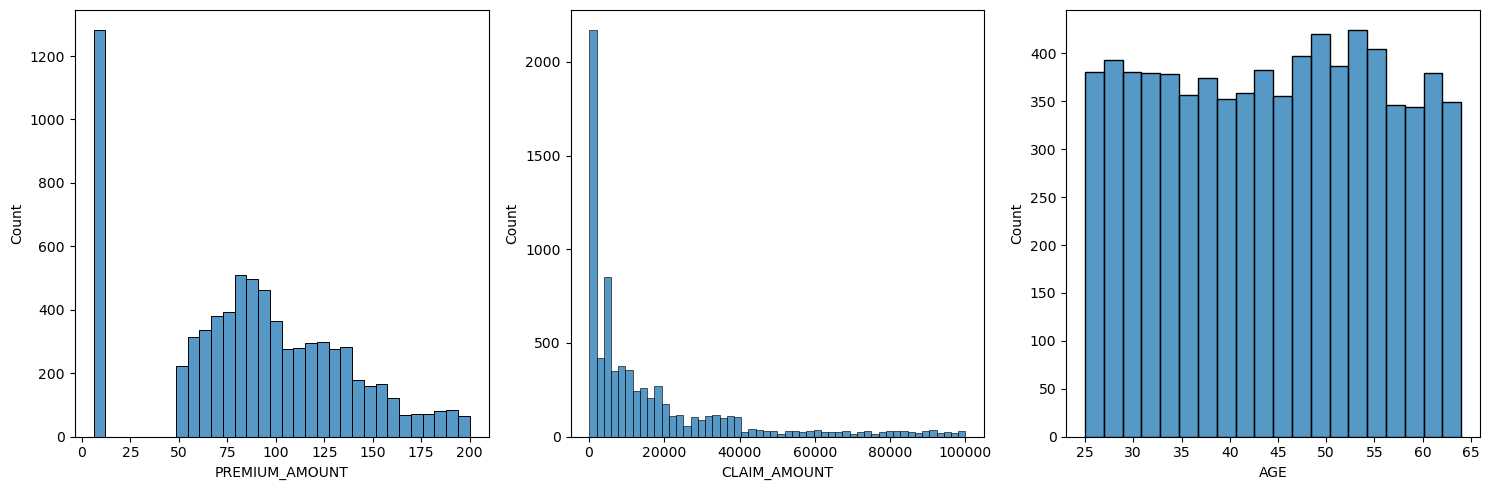

In [131]:
fig,ax = plt.subplots(1,3, figsize = (15,5))

sns.histplot(X_train, x = X_train["PREMIUM_AMOUNT"], ax=ax[0])
sns.histplot(X_train, x = X_train["CLAIM_AMOUNT"], ax=ax[1])
sns.histplot(X_train, x = X_train["AGE"], ax=ax[2])

plt.tight_layout()
plt.show()

We got left skewed on `PREMIUM_AMOUNT` and `CLAIM_AMOUNT`

and uniform distribution on `AGE`, it means the distribution is very consistent.

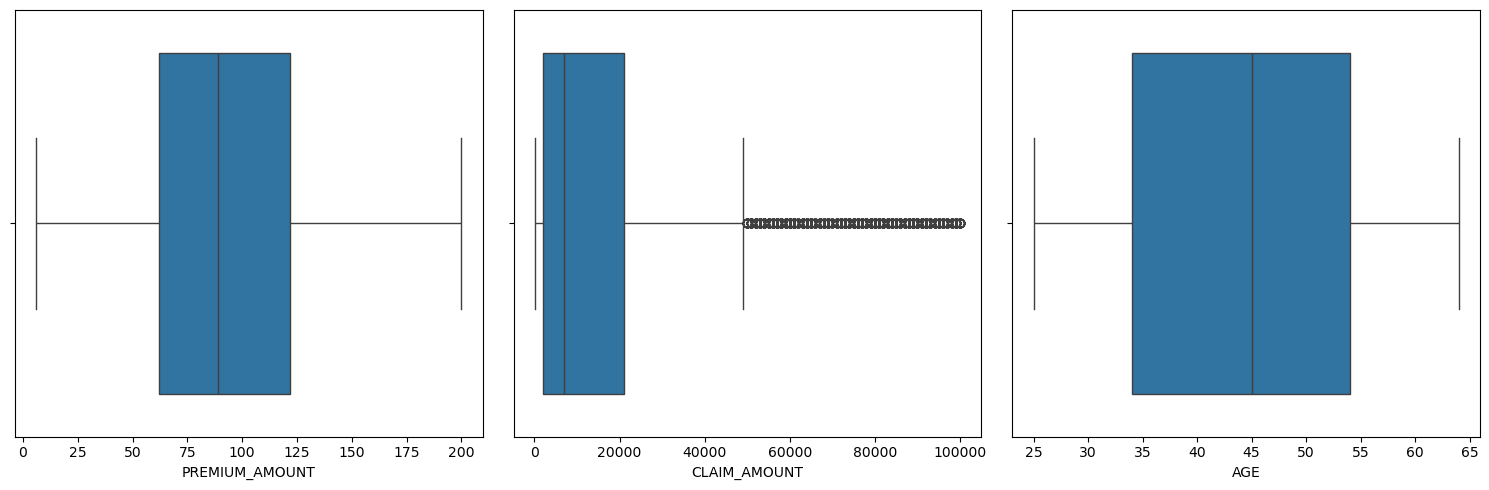

In [132]:
fig,ax = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(X_train, x = X_train["PREMIUM_AMOUNT"], ax=ax[0])
sns.boxplot(X_train, x = X_train["CLAIM_AMOUNT"], ax=ax[1])
sns.boxplot(X_train, x = X_train["AGE"], ax=ax[2])

plt.tight_layout()
plt.show()

Since the variance of the Claim_amount is not a problem, so we will not handle the outliers

### Multivariate Analysis

In [133]:
from scipy.stats import pointbiserialr, chi2_contingency

# 1. Point-Biserial Correlation untuk CLAIM_STATUS dan CLAIM_AMOUNT
claim_amount_corr, _ = pointbiserialr(y_train, X_train['CLAIM_AMOUNT'])
print(f"Point-Biserial Correlation between CLAIM_STATUS and CLAIM_AMOUNT: {claim_amount_corr}")

# 2. Chi-Square Test untuk CLAIM_STATUS dengan RISK_SEGMENTATION dan INCIDENT_SEVERITY
# Membuat tabel kontingensi untuk CLAIM_STATUS dan RISK_SEGMENTATION
contingency_table_risk = pd.crosstab(y_train, X_train['RISK_SEGMENTATION'])
chi2, p, dof, _ = chi2_contingency(contingency_table_risk)
print(f"Chi-Square test result between CLAIM_STATUS and RISK_SEGMENTATION: Chi2 = {chi2}, p-value = {p}")

# Membuat tabel kontingensi untuk CLAIM_STATUS dan INCIDENT_SEVERITY
contingency_table_incident = pd.crosstab(y_train, X_train['INCIDENT_SEVERITY'])
chi2, p, dof, _ = chi2_contingency(contingency_table_incident)
print(f"Chi-Square test result between CLAIM_STATUS and INCIDENT_SEVERITY: Chi2 = {chi2}, p-value = {p}")

Point-Biserial Correlation between CLAIM_STATUS and CLAIM_AMOUNT: 0.0023573492572973066
Chi-Square test result between CLAIM_STATUS and RISK_SEGMENTATION: Chi2 = 6.716304580847869, p-value = 0.03479949894547367
Chi-Square test result between CLAIM_STATUS and INCIDENT_SEVERITY: Chi2 = 0.8599714397966217, p-value = 0.6505183841256655


Summary :
- The relationship between CLAIM_STATUS and CLAIM_AMOUNT is negligible.
- There is a **significant** relationship between CLAIM_STATUS and RISK_SEGMENTATION.
- There is **no significant** relationship between CLAIM_STATUS and INCIDENT_SEVERITY.

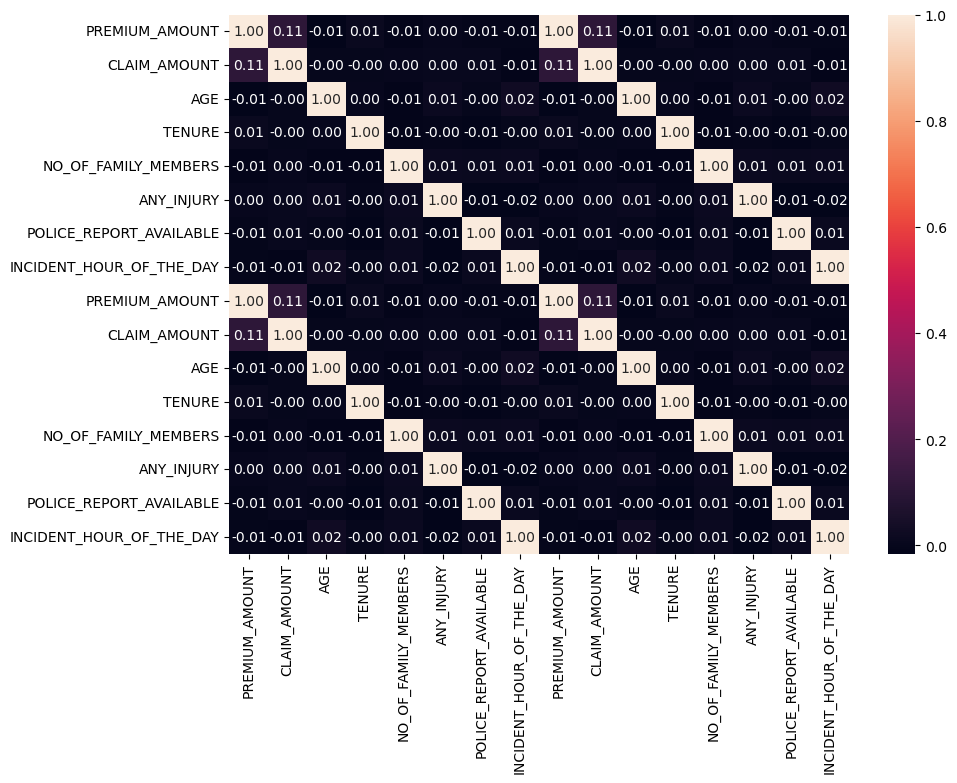

In [134]:
# heatmap correlation
df_corr = pd.concat([X_train_num, y_train_num], axis=1)
corr = df_corr.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [135]:
X_train_cat

,INSURANCE_TYPE,MARITAL_STATUS,EMPLOYMENT_STATUS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,CUSTOMER_EDUCATION_LEVEL,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,INCIDENT_STATE,INCIDENT_CITY
5354,Life,Y,Y,M,Rent,MI,PhD,Minor Loss,Not Contacting,MA,Lawrence
8479,Travel,Y,Y,L,Own,MI,Bachelor,Major Loss,Ambulance,AZ,Glendale
6660,Travel,N,Y,H,Own,MI,Bachelor,Major Loss,Other,CA,Livermore
6839,Property,Y,Y,H,Own,HI,Masters,Total Loss,Not Contacting,AK,Anchorage
8939,Mobile,N,N,L,Own,MI,Bachelor,Minor Loss,Ambulance,CA,Berkeley
...,...,...,...,...,...,...,...,...,...,...,...
6266,Mobile,Y,Y,M,Mortgage,LI,College,Major Loss,Not Contacting,CA,Mountain View
5681,Property,N,Y,L,Rent,HI,Bachelor,Total Loss,Other,FL,Tampa
5896,Property,N,Y,L,Rent,LI,High School,Minor Loss,Not Contacting,KY,Louisville
949,Mobile,N,Y,L,Mortgage,MI,MD,Total Loss,Police,MD,Severna Park


In [136]:
target = pd.DataFrame(y_train)

Text(0, 0.5, 'Frequency')

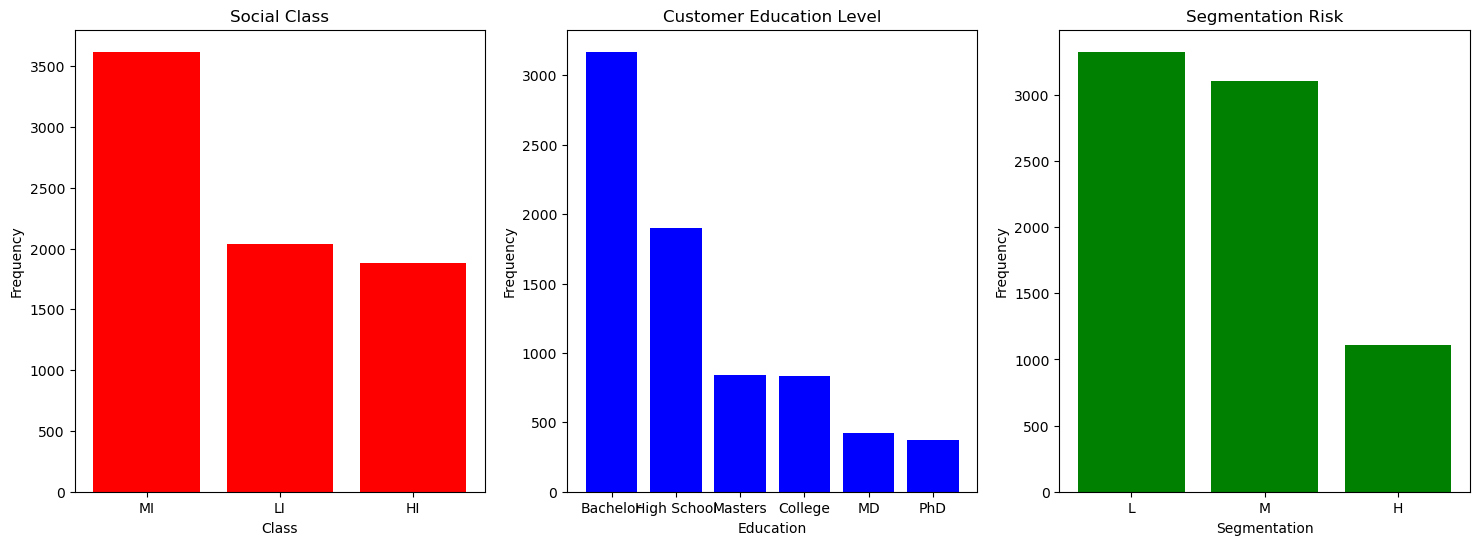

In [137]:
# Social Class
social_class = X_train_cat['SOCIAL_CLASS'].value_counts()
customer_edu = X_train_cat['CUSTOMER_EDUCATION_LEVEL'].value_counts()
risk_segment = X_train_cat['RISK_SEGMENTATION'].value_counts()


fig, axs = plt.subplots(1, 3, figsize=(18, 6), facecolor='white')

t = axs[0].bar(social_class.index, social_class.values, color='red')
axs[0].set_title('Social Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Frequency')

mc = axs[1].bar(customer_edu.index, customer_edu.values, color='blue')
axs[1].set_title('Customer Education Level')
axs[1].set_xlabel('Education')
axs[1].set_ylabel('Frequency')

tc = axs[2].bar(risk_segment.index, risk_segment.values, color='green')
axs[2].set_title('Segmentation Risk')
axs[2].set_xlabel('Segmentation')
axs[2].set_ylabel('Frequency')

## Model Training

In [138]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [139]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [140]:
from sklearn.linear_model import LinearRegression # baseline model
from sklearn.ensemble import RandomForestRegressor #perwakilan bagging
from sklearn.tree import DecisionTreeRegressor #baseline untuk ensemble model
from xgboost import XGBRegressor #perwakilan dari gradient boosted #buatan rusia
from lightgbm import LGBMRegressor #perwakilan dari gradien boosted #buatan microsoft

#---- Classification -----

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (r2_score,mean_absolute_error,mean_squared_error)


In [141]:
#==== Set Up model ====
xgb = XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
linear = LinearRegression() #baseline model

In [142]:
#iterate model
ml = [('Linear Regression',linear),
      ('Decission Trees',dt),
         ('Random Forest',rf),
        ("Ligth GBM Regressor",lgbm),
         ('Xgboost',xgb)]

r2_train = []
r2_test = []
mae_train = []
mae_test = []
mse_train = []
mse_test = []
rmse_train = []
rmse_test = []
models = []

for model in ml:
  for x in range(0,11):
    model[1].fit(X_train,y_train)

    predict_train = model[1].predict(X_train)
    predict_test = model[1].predict(X_test)

    r2_score_train = r2_score(y_train,predict_train)
    r2_score_test = r2_score(y_test,predict_test)

    mae_score_train = mean_absolute_error(y_train,predict_train)
    mae_score_test = mean_absolute_error(y_test,predict_test)

    mse_score_train = mean_squared_error(y_train,predict_train)
    mse_score_test = mean_squared_error(y_test,predict_test)

    rmse_score_train = np.sqrt(mse_score_train)
    rmse_score_test = np.sqrt(mse_score_test)

    r2_train.append(r2_score_train)
    r2_test.append(r2_score_test)
    mae_train.append(mae_score_train)
    mae_test.append(mae_score_test)
    mse_train.append(mse_score_train)
    mse_test.append(mse_score_test)
    rmse_train.append(rmse_score_train)
    rmse_test.append(rmse_score_test)
    models.append(model[0])


df_metrics = pd.DataFrame({'model':models,
                           'r2_score_train':r2_train,
                           'r2_score_test':r2_test,
                           'MAE_train':mae_train,
                           'MAE_test':mae_test,
                           'MSE_train':mse_train,
                           'MSE_test':mse_test,
                           'RMSE_train':rmse_train,
                           'RMSE_test':rmse_test})

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 7541, number of used features: 44
[LightGBM] [Info] Start training from score 0.051982
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 7541, number of used features: 44
[LightGBM] [Info] Start training from score 0.051982
[LightGBM] [Warning] Found white

In [143]:
df_metrics

,model,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,Linear Regression,0.047119,-0.048519,0.097056,0.093021,0.046958,0.044113,0.216699,0.210031
1,Linear Regression,0.047119,-0.048519,0.097056,0.093021,0.046958,0.044113,0.216699,0.210031
2,Linear Regression,0.047119,-0.048519,0.097056,0.093021,0.046958,0.044113,0.216699,0.210031
3,Linear Regression,0.047119,-0.048519,0.097056,0.093021,0.046958,0.044113,0.216699,0.210031
4,Linear Regression,0.047119,-0.048519,0.097056,0.093021,0.046958,0.044113,0.216699,0.210031
5,Linear Regression,0.047119,-0.048519,0.097056,0.093021,0.046958,0.044113,0.216699,0.210031
6,Linear Regression,0.047119,-0.048519,0.097056,0.093021,0.046958,0.044113,0.216699,0.210031
7,Linear Regression,0.047119,-0.048519,0.097056,0.093021,0.046958,0.044113,0.216699,0.210031
8,Linear Regression,0.047119,-0.048519,0.097056,0.093021,0.046958,0.044113,0.216699,0.210031
9,Linear Regression,0.047119,-0.048519,0.097056,0.093021,0.046958,0.044113,0.216699,0.210031
